In [1]:
#Importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#Loading the dataset
df=pd.read_csv(r"C:\Users\USER\Downloads\titanic\train.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
df.info()                        #shows information adout the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
#Summary statistics
df.describe()                               #shows the summary of the dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#DATA CLEANING
#Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#Check for duplicate values
df.duplicated().sum()

0

In [16]:
#Handling missing values by filling with meadian or mode
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [28]:
#'CABIN' has too many missing values.
#Drop CABIN
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'],inplace=True)

In [ ]:
#VISUALIZE THE DATA

<Figure size 2000x1000 with 0 Axes>

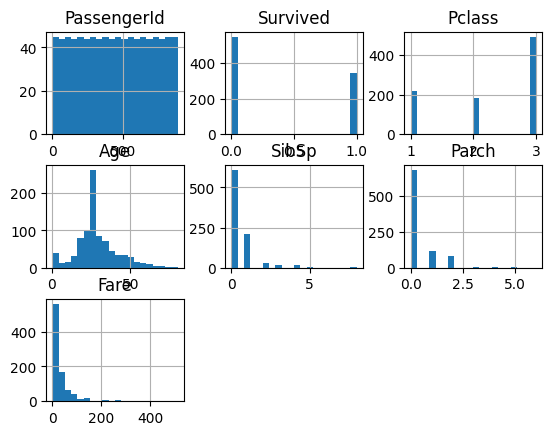

In [33]:
plt.figure(figsize=(15,15))
df.hist(bins=20)
plt.show()

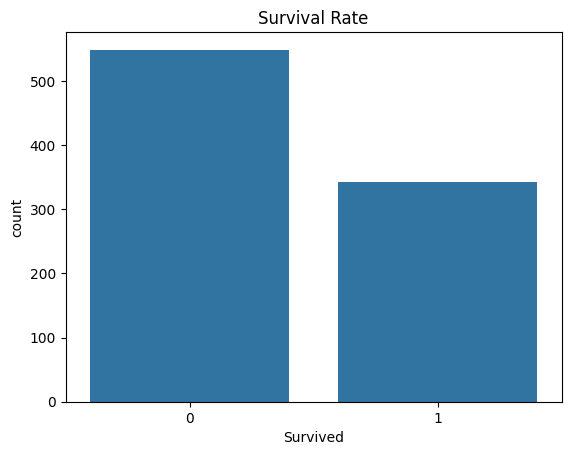

In [44]:

sns.countplot(x='Survived', data=df)
plt.title('Survival Rate')
plt.show()


In [ ]:
#The above countplot describes that survived rate is less in the dataset.

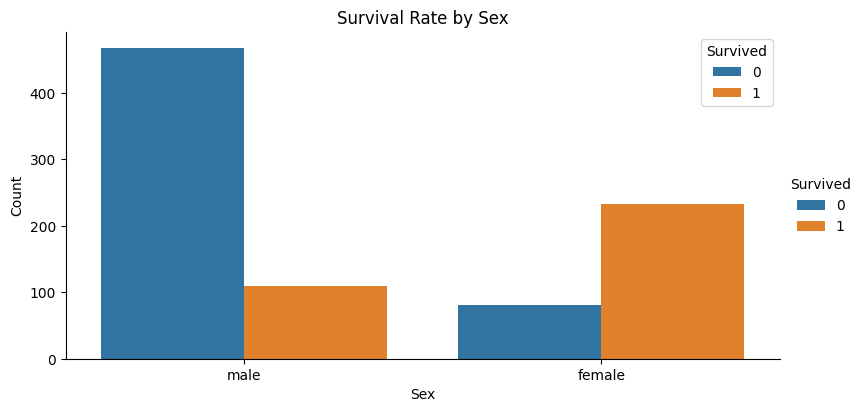

In [37]:
sns.catplot(data=df, x="Sex", hue="Survived", kind="count", height=4, aspect=2)
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

In [ ]:
#The catplot of Survival Rate by Sex typically shows that Women had high survived rate compared to men.

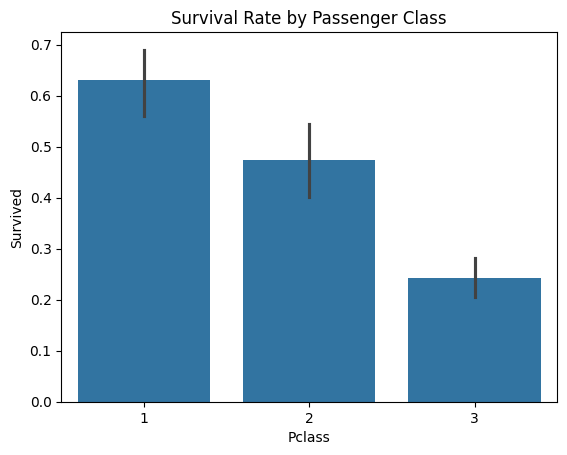

In [45]:
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

In [ ]:
#From the above Barplot we can conclude that first class people had survived more in numbers.

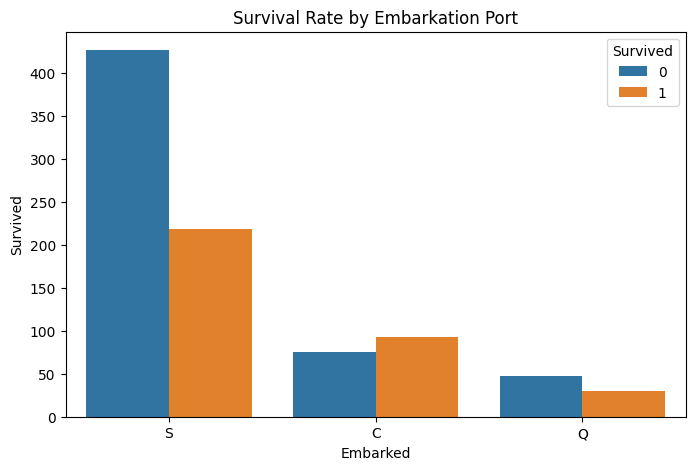

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked',hue='Survived',data=df)
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarked")
plt.ylabel("Survived")
plt.show()

In [ ]:
#The above countplot shows that comparitively people to "Southampton" had survived more.

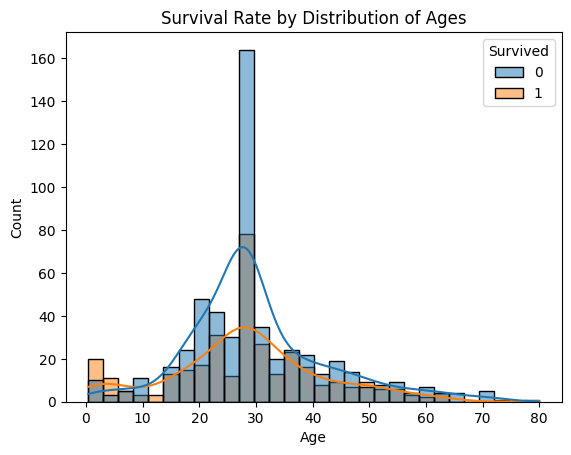

In [57]:
sns.histplot(x='Age',hue='Survived',data=df,kde=True)
plt.title("Survival Rate by Distribution of Ages")
plt.show()

In [ ]:
# From the age distribution histogram we come to know that children might have a noticeable peak if they had a higher survival rate.

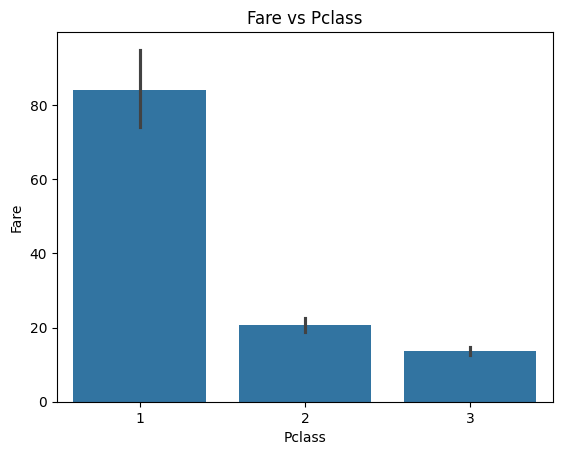

In [63]:
sns.barplot(x="Pclass",y="Fare",data=df)
plt.title("Fare vs Pclass")
plt.show()

In [ ]:
#As we know already,1st class had high fare compared to others

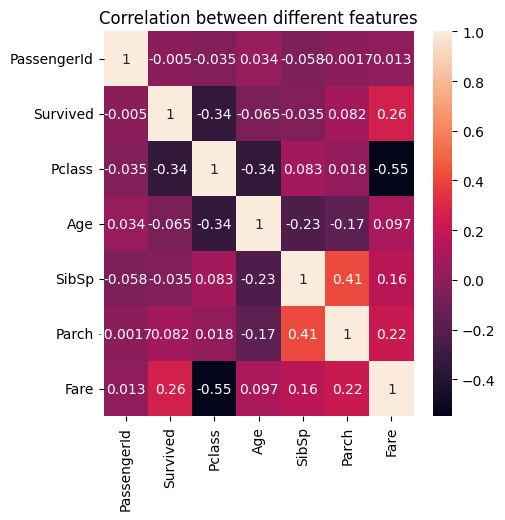

In [65]:
#CORRELATION OF FEATURES
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("Correlation between different features")
plt.show()